# Random Forests and Ensembles
* By Wai Ping Jerry KWOK
* Created on 2023-10-08

### Objective:

The goal of the project is to successfully train and test a random forest, compare it to a decision tree and knn classifier. Also to train a simple stacking ensemble using a dt, knn and svm as base learners and a random forest as the meta-model.

### Instructions:

1. From the Caltech-UCSD CUB-200-2011 data set you will need *image_attribute_labels.txt* and *image_class_labels.txt* they can be found at the following links:
* http://www.vision.caltech.edu/datasets/cub_200_2011/
* https://drive.google.com/drive/folders/1kFzIqZL_pEBVR7Ca_8IKibfWoeZc3GT1
2. Follow the guidelines for the data preprocessing phase given below. You are welcome to preprocess the data as you wish, but good preprocessing is crucial for this project.

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from prettytable import PrettyTable
import joblib

# import from sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix

### 1. Data Preprocessing

**A correspondence should set up between the attributes and the labels. The aim is to set up a structure where each image's attributes can be related to its label. By the end, there are separate numpy arrays for training/testing attributes and their corresponding labels. In other words, your code takes two separate data sources – one with image attributes and the other with image labels – and processes them to form training and testing datasets where machine learning algorithms can learn the relationship between attributes and their corresponding labels.**

#### 1.1 The Data:

**1. The first file *image_attribute_labels.txt* contains information about image attributes. It is read with space as a delimiter (*\s+*)**

In [5]:
# read the first file *image_attribute_labels.txt* preliminarily 
# with specifying the separator
# it triggers the error of "ParserError: Error tokenizing data. C error: Expected 5 fields in line 709498, saw 6"

'''df1 = pd.read_csv(
    'image_attribute_labels.txt', 
    sep='\s+')'''

"df1 = pd.read_csv(\n    'image_attribute_labels.txt', \n    sep='\\s+')"

**Discussion**
1. Specifying the separator to 'space' triggers a Parser Error. We should be aware that there are lines with data entry error.
2. We can load the file without specifying the separator to check first.
3. Looking at the preliminary load, we can see that there is no header row.

In [6]:
# again, read the first file *image_attribute_labels.txt* preliminarily 
# without specifying the separator
df1 = pd.read_csv(
    'image_attribute_labels.txt')
df1

,1 1 0 3 27.7080
0,1 2 0 3 27.7080
1,1 3 0 3 27.7080
2,1 4 0 3 27.7080
3,1 5 1 3 27.7080
4,1 6 0 3 27.7080
...,...
3677850,11788 308 1 4 4.9890
3677851,11788 309 0 4 8.3090
3677852,11788 310 0 4 8.3090
3677853,11788 311 0 4 8.3090


**2. Only the first three columns should be loaded (*imgid*, *attid*, *present*)**

In [7]:
# load only the first 3 columns and specify the column names and separator
df1 = pd.read_csv(
    'image_attribute_labels.txt',
    sep='\s+',
    usecols=[0, 1, 2],
    names=['imgid', 'attid', 'present'],
    header=None)
df1

,imgid,attid,present
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,1,5,1
...,...,...,...
3677851,11788,308,1
3677852,11788,309,0
3677853,11788,310,0
3677854,11788,311,0


**3. The second file *image_class_labels.txt* has class labels for the image. It is read with space delimeter too.**

In [8]:
# read the data preliminarily with the space delimiter
df2 = pd.read_csv(
    'image_class_labels.txt', 
    sep='\s+', 
    header=None, 
    index_col=False)
df2

,0,1
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
11783,11784,200
11784,11785,200
11785,11786,200
11786,11787,200


**4. Output the heads of both files, and the file sizes/shapes. Discuss contents in detail.**

In [9]:
# display the first 5 rows of df1
df1.head()

,imgid,attid,present
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,1,5,1


In [10]:
# display the number of rows and columns of df1
print(f'Number of rows of df1: {df1.shape[0]}')
print(f'Number of columns of df1: {df1.shape[1]}')

Number of rows of df1: 3677856
Number of columns of df1: 3


In [11]:
# display the first 5 rows of df2
df2.head()

,0,1
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [12]:
# display the number of rows and columns of df2
print(f'Number of rows of df2: {df2.shape[0]}')
print(f'Number of columns of df2: {df2.shape[1]}')

Number of rows of df2: 11788
Number of columns of df2: 2


**Discussion**

For *image_attribute_labels.txt*
1. There are 3677856 rows and we loaded the first 3 columns only as *imgid*, *attid*, *present*.
2. There is no header.
3. The delimiter is 'space'.
4. As from the README file, in the original txt file, there *should be* 5 columns and they are *image_id*, *attribute_id*, *is_present*, *certainty_id*, *time*.
5. We should be aware that there are rows with bad data entry but df1 is successfully loaded with 3 columns with the same 3677856 rows. We should take a look into how to handle those rows with bad data entry before proceeding.

For *image_class_labels.txt*
1. There are 11788 rows and 2 columns.
2. There is no header.
3. The delimiter is 'space'.
4. As from the README file, in the original txt file, there *should be* 2 columns and they are *image_id*, *class_id*.

#### 1.2 Handling Bad Entries:

**1. Occasionally, files may contain corrupted or wrongly formatted lines. We use the *on_bad_lines='skip'* argument to ensure such lines are skipped during loading.**

**2. Use the *pandas* library to load the two text files, *image_attribute_labels.txt* and *image_class_labels.txt*. Name them *imgatt*, and *imglabels*, respectively.**

In [13]:
# load the first file *image_attribute_labels.txt* by skipping the bad lines
imgatt = pd.read_csv(
    'image_attribute_labels.txt', 
    sep='\s+', 
    header=None, 
    names=['imgid', 'attid', 'present', 'certainty', 'time'], 
    on_bad_lines='skip')
imgatt

,imgid,attid,present,certainty,time
0,1,1,0,3,27.708
1,1,2,0,3,27.708
2,1,3,0,3,27.708
3,1,4,0,3,27.708
4,1,5,1,3,27.708
...,...,...,...,...,...
3677245,11788,308,1,4,4.989
3677246,11788,309,0,4,8.309
3677247,11788,310,0,4,8.309
3677248,11788,311,0,4,8.309


**Discussion:**
1. We can note that there are 3677250 rows now, 606 fewer rows than that in df1.
2. Considering we have over 3M rows in total, 606 rows are less than 0.02% of the total. Being cautious about bad data, We can accept to have dropped these rows.
3. We can drop the last two columns now.

In [14]:
# drop the last two columns of imgatt
imgatt = imgatt.drop(columns=['certainty', 'time'])

In [15]:
# load the second file *image_class_labels.txt*
imglabels = pd.read_csv(
    'image_class_labels.txt', 
    sep='\s+', 
    header=None, 
    names=['imgid', 'classid'])
imglabels

,imgid,classid
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
11783,11784,200
11784,11785,200
11785,11786,200
11786,11787,200


**3. Always inspect the loaded data using methods like *head()*, *info()*, or *describe()* to understand its structure and to identify any inconsistencies.**

In [16]:
# show the information of imgatt
imgatt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3677250 entries, 0 to 3677249
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   imgid    int64
 1   attid    int64
 2   present  int64
dtypes: int64(3)
memory usage: 84.2 MB


In [17]:
# show the descriptive statistics of imgatt
imgatt.describe().map(lambda x: f'{x:0.4f}')

,imgid,attid,present
count,3677250.0000,3677250.0000,3677250.0000
mean,5894.5124,156.4993,0.1009
std,3402.8790,90.0666,0.3012
min,1.0000,1.0000,0.0000
25%,2948.0000,78.0000,0.0000
50%,5894.5000,156.0000,0.0000
75%,8841.0000,234.0000,0.0000
max,11788.0000,312.0000,1.0000


In [18]:
# show the information of imglabels
imglabels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11788 entries, 0 to 11787
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   imgid    11788 non-null  int64
 1   classid  11788 non-null  int64
dtypes: int64(2)
memory usage: 184.3 KB


In [19]:
# show the descriptive statistics of imglabels
imglabels.describe().map(lambda x: f'{x:0.4f}')

,imgid,classid
count,11788.0000,11788.0000
mean,5894.5000,101.1263
std,3403.0468,57.4768
min,1.0000,1.0000
25%,2947.7500,51.0000
50%,5894.5000,101.0000
75%,8841.2500,151.0000
max,11788.0000,200.0000


**Discussion:**

For *imgatt*
1. There are 3 columns which are all integers.
2. For *imgid*, the min is 1 and the max is 11788.
3. For *attid*, the min is 1 and the max is 312.
4. For *present*, it is binary (0 or 1).

For *imglabels*
1. There are 2 columns which are all integers.
2. For *imgid*, the min is 1 and the max is 11788.
3. for *classid*, the min is 1 and the max is 200.

These observations are same as expectation.

**4. Output shape, and head of the image attributes**

In [20]:
# display the number of rows and columns of imgatt
print(f'Number of rows of imgatt: {imgatt.shape[0]}')
print(f'Number of columns of imgatt: {imgatt.shape[1]}')

Number of rows of imgatt: 3677250
Number of columns of imgatt: 3


In [21]:
# inspect the first 5 rows of imgatt
imgatt.head()

,imgid,attid,present
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,1,5,1


In [22]:
# inspect the first 5 rows of imglabels
imglabels.head()

,imgid,classid
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


**Discussion**
1. The two dataframes are gracefully loaded as intended, with the problematic rows being dropped.

#### 1.3 Data Transformation:

**1. The data from *image_attribute_labels.txt* needs to be transformed from a long format to a wide format. The *pivot* method in *pandas* will help transform the data such that each image ID has all the attributes associated with it in separate columns. Make sure there are no duplicates or pivot will give you an error. Name this *imgatt2*.**

In [23]:
# check duplicated rows in imgatt
imgatt.duplicated().sum()

0

In [24]:
# check null values in imgatt
imgatt.isnull().sum()

imgid      0
attid      0
present    0
dtype: int64

**Discussion**
1. There is no duplicate rows in *imgatt*.
2. There is no null value in *imgatt*.

We can proceed for data transformation.

In [25]:
# pivot the imgatt dataframe
imgatt2 = imgatt.pivot(index='imgid', columns='attid', values='present')
imgatt2

attid,1,2,3,4,5,6,7,8,9,10,...,303,304,305,306,307,308,309,310,311,312
imgid,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11784,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11785,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
11786,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


**Discussion**
1. Since we have dropped some rows in the dataset before the pivot, we should check for null values after the pivot.

In [26]:
# check null values in imgatt2
imgatt2.isna().sum().sum()

606

**Discussion**

There are 606 null values. We should drop them first.

In [27]:
# remove the null values in imgatt2
imgatt2 = imgatt2.dropna()
imgatt2

attid,1,2,3,4,5,6,7,8,9,10,...,303,304,305,306,307,308,309,310,311,312
imgid,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11784,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11785,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
11786,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [28]:
# check null values in imgatt2 again
imgatt2.isna().sum().sum()

0

**Discussion**

1. There are 11786 rows, only 2 rows less in imgatt2 now after removing 606 null values.
2. We may proceed to the next step.

**2. Output the head of the new arrangement; and the number of rows and columns**

In [29]:
# inspect the first 5 rows of imgatt2
imgatt2.head()

attid,1,2,3,4,5,6,7,8,9,10,...,303,304,305,306,307,308,309,310,311,312
imgid,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# display the number of rows and columns of imgatt2
print(f'Number of rows of imgatt2: {imgatt2.shape[0]}')
print(f'Number of columns of imgatt2: {imgatt2.shape[1]}')

Number of rows of imgatt2: 11786
Number of columns of imgatt2: 312


#### 1.4 Data Merging and Shuffle:

**1. Set your imglabels data index to *imgid***

In [31]:
# set the index of imglabels to imgid
imglabels = imglabels.set_index('imgid')

**2. Merge the two dataframes on a common column, *imgid* to create a new dataframe**

In [32]:
# merge imgatt2 and imglabels on imgid
imgatt_merged = pd.merge(imgatt2, imglabels, how='inner', on='imgid')
imgatt_merged

,1,2,3,4,5,6,7,8,9,10,...,304,305,306,307,308,309,310,311,312,classid
imgid,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11784,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,200
11785,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,200
11786,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,200


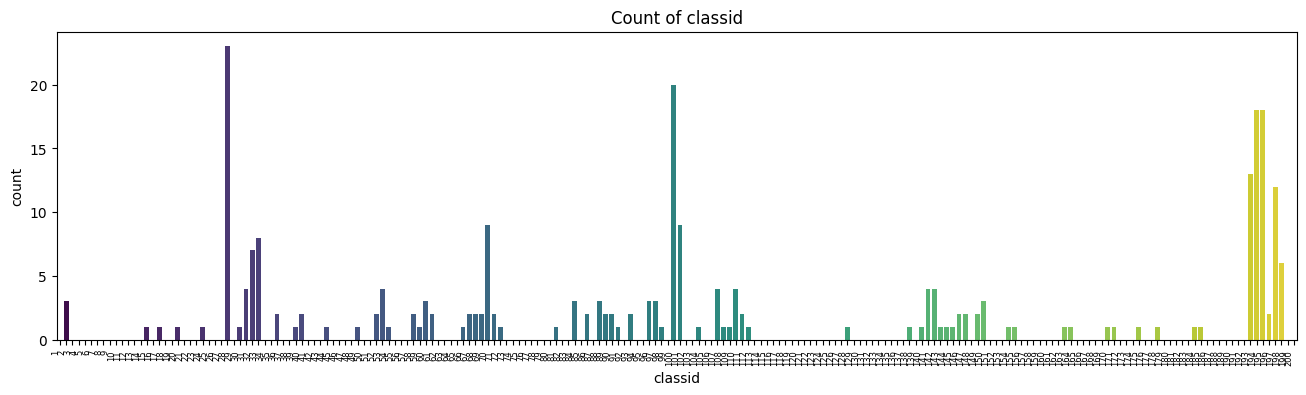

In [33]:
# make a plot of count of classid
plt.figure(figsize=(16, 4))

sns.countplot(data=imgatt_merged, x='classid', hue='classid', palette='viridis', legend=False)

plt.title('Count of classid')
plt.xticks(rotation=90, ha='right', fontsize=6)
plt.show()

**Discussion**

1. Since the data consists of only 0 and 1, we do not need to apply scaler to the dataset before putting into models.
2. There are 200 classes, and the classes are imbalanced. We should consider using Stratified K-fold cross validation later to ensure each fold has a representation ratio of the classes.

**3. Randomly shuffle your dataframe using *.sample* with *frac=1*, and *random_state=10*. (I want this reproducible)**

In [34]:
# shuffle imgatt_merged using .sample() method
imgatt_merged = imgatt_merged.sample(frac=1, random_state=10)

**4. Split your new dataframe into attributes and labels where your attributes contains all columns but the last. Your labels contain only the last column. Using *.iloc* is useful here as it preserves indexing.**

In [35]:
# split imgatt_merged into attributes as X and labels as y
X = imgatt_merged.iloc[:, :-1]
y = imgatt_merged.iloc[:, -1]

In [36]:
# display the first 5 rows of X
X.head()

,1,2,3,4,5,6,7,8,9,10,...,303,304,305,306,307,308,309,310,311,312
imgid,,,,,,,,,,,,,,,,,,,,,
1361,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10817,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
478,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8979,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
# display the first 5 rows of y
y.head()

imgid
1361      25
10817    184
478        9
2739      48
8979     153
Name: classid, dtype: int64

**5. Convert to a numpy arrays**

In [38]:
# convert X to numpy array
X_np = X.to_numpy()
X_np

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [39]:
# convert y to a numpy array
y_np = y.to_numpy()
y_np

array([ 25, 184,   9, ...,  25, 125,  23], dtype=int64)

**6. Flatten your labels**

In [40]:
# flatten y_np
y_np = y_np.flatten()
y_np

array([ 25, 184,   9, ...,  25, 125,  23], dtype=int64)

### 2. Training and Testing Sets

**1. Create your training and testing sets.**

**Discussion**

Usually, the training and testing split can be (70%/30%) to (80%/20%). For having an imbalanced dataset, we should put more data for training to avoid overfitting. We would take the 80%/20% split.

In [41]:
# create train and test sets for X and y with 80% and 20% respectively
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, train_size=.8, random_state=10)

In [42]:
# print the shape of X_train, X_test, y_train, y_test
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (9428, 312)
X_test shape: (2358, 312)
y_train shape: (9428,)
y_test shape: (2358,)


### 3. Random Forest Classifier:

**1. Implement a Random Forest classifier. With *max features=15*, and 25 trees.**

In [43]:
# create a RandomForestClassifier object
rf_clf = RandomForestClassifier(
    n_estimators=25, 
    max_features=15, 
    random_state=10)

**2. Train the classifier on the training data and test its performance on the testing data.**

In [44]:
# fit the model with X_train and y_train
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_features=15, n_estimators=25, random_state=10)

In [45]:
# predict the labels of X_test
y_pred_rf_clf = rf_clf.predict(X_test)

**3. Print the training and testing accuracies. What do the scores suggest?**

In [145]:
# setup a dictionary to save the accuracies for comparison
comparison = dict()

In [146]:
# save the accuracies to the dictionary for comparison
comparison['rf_clf'] = {
    'acc_train': rf_clf.score(X_train, y_train), 
    'acc_test': rf_clf.score(X_test, y_test)
    }

In [151]:
# define a function to print results fron the dictionary
def print_results(model_name_toprint, result_dict, model_name):
    print(f'{model_name_toprint}:')
    print('=' * 40)
    print(f'Training accuracy: {result_dict[model_name]["acc_train"]:.6f}')
    print(f'Testing accuracy: {result_dict[model_name]["acc_test"]:.6f}')

In [152]:
print_results('Random Forest Classifier', comparison, 'rf_clf')

Random Forest Classifier:
Training accuracy: 0.998303
Testing accuracy: 0.367260


**Discussion:**
1. Training accuracy is much higher than Testing accuracy. The model is overfitted.

### 4. Confusion Matrix:

**1. Generate a confusion matrix for the Random Forest classifier's predictions on the test data.**

In [49]:
# create a confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_clf)

**2. Visualize this matrix (you may need to implement or use a utility function for visualization).**

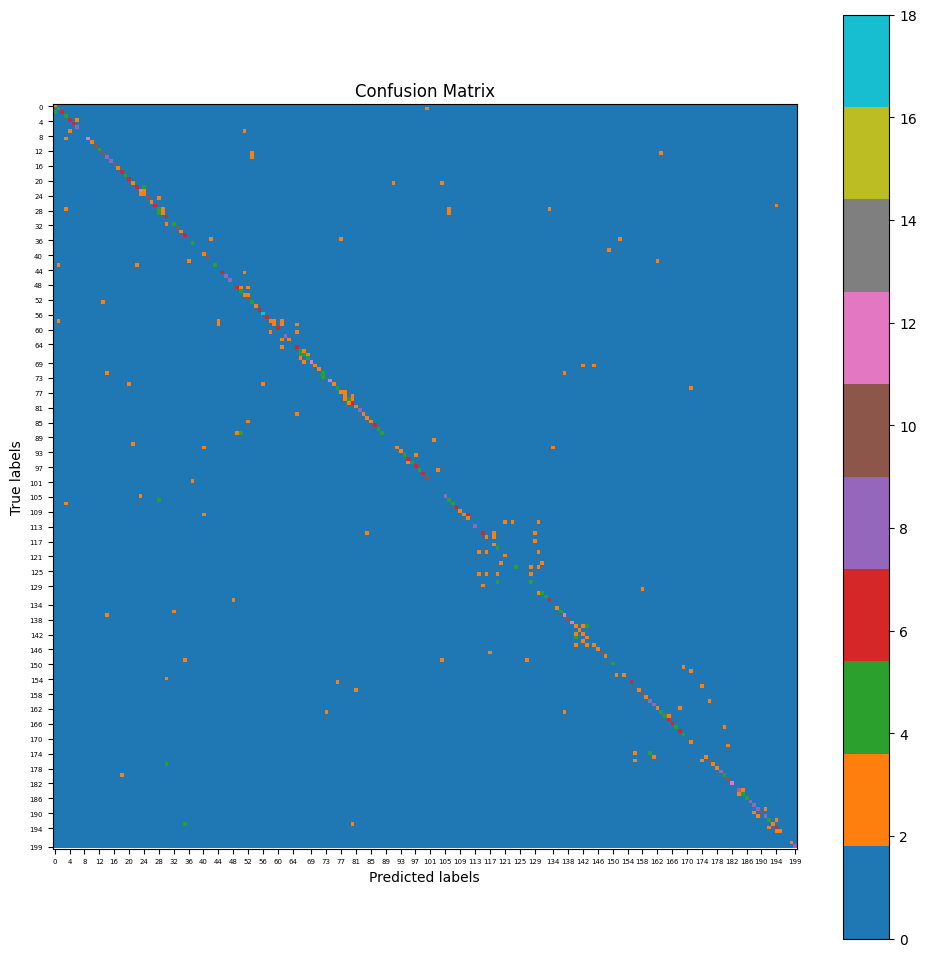

In [50]:
# display the confusion matrix with matplotlib
plt.figure(figsize=(12, 12))

plt.imshow(cm, cmap=plt.cm.tab10, interpolation='none')

plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

ticks = np.linspace(0, 199, num=50, dtype=np.int32)
plt.xticks(ticks=ticks, fontsize=5)
plt.yticks(ticks=ticks, fontsize=5)

plt.colorbar()

plt.show()

**Discussion**

From the Confustion Matrix, we can see that many dots are along the diagonal line, which means that those predictions are correct. 

### 5. Model Comparisons:

#### 5.1 KNN:

**1. Implement a K-Nearest Neighbors (KNN) classifier.**

In [51]:
# create a KNeighborsClassifier object with default parameters
knn_clf = KNeighborsClassifier()

**2. Train and test the KNN model.**

In [52]:
# fit the model with X_train and y_train
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
# predict the labels of X_test
y_pred_knn_clf = knn_clf.predict(X_test)

**3. Output the test results.**

In [153]:
# save the accuracies to the comparison dictionary
comparison['knn_clf'] = {
    'acc_train': knn_clf.score(X_train, y_train), 
    'acc_test': knn_clf.score(X_test, y_test)}

In [154]:
# print the results
print_results('KNN Classifier', comparison, 'knn_clf')

KNN Classifier:
Training accuracy: 0.532669
Testing accuracy: 0.303647


#### 5.2 Decision Tree:

**1. Implement a Decision Tree classifier.**

In [56]:
# create a DecisionTreeClassifier object
dt_clf = DecisionTreeClassifier(random_state=10)

**2. Train and test the Decision Tree model.**

In [57]:
# fit the model with X_train and y_train
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [58]:
# predict the labels of X_test
y_pred_dt_clf = dt_clf.predict(X_test)

**3. Output the test results.**

In [155]:
# save the accuracies to the comparison dictionary
comparison['dt_clf'] = {
    'acc_train': dt_clf.score(X_train, y_train), 
    'acc_test': dt_clf.score(X_test, y_test)}

In [156]:
# print the results
print_results('Decision Tree Classifier', comparison, 'dt_clf')

Decision Tree Classifier:
Training accuracy: 0.998409
Testing accuracy: 0.278626


#### 5.3 Compare the performance of the Random Forest, KNN, and Decision Tree models and report their accuracies.

In [157]:
# create a PrettyTable object
pt = PrettyTable()

# add the column names
pt.field_names = ['Model', 'Training Accuracy', 'Testing Accuracy']

# add the values to the table
for k, v in comparison.items():
    pt.add_row([k, v['acc_train'], v['acc_test']])

print(pt)

+---------+--------------------+---------------------+
|  Model  | Training Accuracy  |   Testing Accuracy  |
+---------+--------------------+---------------------+
|  rf_clf | 0.9983029274501485 |  0.3672603901611535 |
| knn_clf | 0.5326686465846415 | 0.30364715860899066 |
|  dt_clf | 0.9984089944845143 |  0.2786259541984733 |
+---------+--------------------+---------------------+


**Discussion**

1. The K-nearest Neighbour (knn) model and the Decision Tree (dt) model are implemented using the default parameters. 
2. The knn model performs unsatisfactorily with the training accuracy only at 0.53.
3. Random Forest (rf) model and the dt model perform very well in Training. They both achieved an accuracy of more than 0.998.
4. For all 3 models, the training accuracy is much higher than the testing accuracy. It implies they are overfitted. They are not good at classifying new data. 
5. We should find alternative algorithm for this classification problem.

### 6. Cross-Validation:

**1. Perform 5-fold cross-validation on the Random Forest, KNN, and Decision Tree models.**

**Discussion**

Since the dataset is imbalanced, we should use stratified K-fold for cross validation.

In [158]:
# set up cross validation with 5 folds in a stratified manner
cv_skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

In [159]:
# perform 5-fold cross validation on the random forest classifier
rf_scores = cross_val_score(rf_clf, X_np, y_np, cv=cv_skf)

# save the scores to the comparison dictionary
comparison['rf_clf']['5-fold_scores'] = rf_scores

In [160]:
# perform 5-fold cross validation on the knn classifier
knn_scores = cross_val_score(knn_clf, X_np, y_np, cv=cv_skf)

# save the scores to the comparison dictionary
comparison['knn_clf']['5-fold_scores'] = knn_scores

In [161]:
# perform 5-fold cross validation on the dt classifier
dt_scores = cross_val_score(dt_clf, X_np, y_np, cv=cv_skf)

# save the scores to the comparison dictionary
comparison['dt_clf']['5-fold_scores'] = dt_scores

**2. Print the average accuracy and standard deviation for all three models.**

In [162]:
# add columns to the PrettyTable object
pt.add_column('Stratified 5-fold Accuracy (Average)', 
              [v['5-fold_scores'].mean() for k, v in comparison.items()])
pt.add_column('Stratified 5-fold Accuracy Std Dev', 
              [v['5-fold_scores'].std() for k, v in comparison.items()])

print(pt)

+---------+--------------------+---------------------+--------------------------------------+------------------------------------+
|  Model  | Training Accuracy  |   Testing Accuracy  | Stratified 5-fold Accuracy (Average) | Stratified 5-fold Accuracy Std Dev |
+---------+--------------------+---------------------+--------------------------------------+------------------------------------+
|  rf_clf | 0.9983029274501485 |  0.3672603901611535 |          0.4052258391170905          |        0.008354016810558482        |
| knn_clf | 0.5326686465846415 | 0.30364715860899066 |          0.3258095370727226          |        0.009426081103632184        |
|  dt_clf | 0.9984089944845143 |  0.2786259541984733 |          0.2791442882317231          |        0.013298848564163227        |
+---------+--------------------+---------------------+--------------------------------------+------------------------------------+


**Discussion**
1. With stratified 5-fold cross validation, the best model is random forest with average accuracy at 0.405226 +/- 0.008354 (mean +/- 1 s.d.).

### 7. Hyperparameter Tuning:

**1. For the Random Forest classifier, experiment with different values of *max_features* (range: 5 to 50 in steps of 5) and *n_estimators* (range: 10 to 200 in steps of 10). Note: you may use *GridSearchCV*.(this can take a while you can shorten the search if you run into memory problems)**

In [67]:
# set up the parameters
max_features_v = np.arange(5, 50, 5)
n_estimators_v = np.arange(10, 200, 10)

In [68]:
# create a dictionary of parameters
param_grid = {
    'max_features': max_features_v,
    'n_estimators': n_estimators_v
}

In [69]:
# create the cross validation object
cv = KFold(n_splits=5, shuffle=True, random_state=10)

In [70]:
# create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf_clf, 
    param_grid=param_grid,
    cv=cv,
    verbose=1)

In [71]:
# fit the model with X_train and y_train
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 171 candidates, totalling 855 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=RandomForestClassifier(max_features=15, n_estimators=25,
                                              random_state=10),
             param_grid={'max_features': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
             verbose=1)

**2. Output the grid search results, and indicate the best settings.**

In [72]:
# output the grid search results
grid_search.cv_results_

{'mean_fit_time': array([ 0.41467791,  0.79651699,  1.20956855,  1.55720639,  2.06536064,
         2.59229703,  2.96237221,  3.61044946,  4.03062429,  4.61832304,
         5.19346867,  5.58683453,  6.16989417,  6.2468565 ,  6.58285685,
         7.04268389,  7.88856978,  8.06177649,  8.7250773 ,  0.54138079,
         1.13646193,  1.56139317,  2.13075175,  2.50652013,  3.02885594,
         3.51526427,  4.01767926,  4.50916214,  5.02171879,  5.5074985 ,
         6.01059909,  6.50679545,  7.1814332 ,  7.57816858,  7.98656306,
         8.50088506,  9.15607314,  9.93397574,  0.53493886,  1.06417303,
         1.60966334,  2.11397657,  2.622786  ,  3.13512225,  3.67252855,
         4.16314993,  4.7078424 ,  5.18897266,  5.69199538,  6.06158247,
         6.42795577,  7.19800129,  7.78388729,  7.86265497,  9.34558311,
         9.3412066 ,  9.34018464,  0.54318528,  1.06560178,  1.59694781,
         2.15486188,  2.70623484,  3.30692701,  3.94019089,  4.6303062 ,
         5.22914963,  5.35105195, 

In [73]:
# print the best parameters
grid_search.best_score_

0.45884656170976423

In [74]:
# print the best parameters
grid_search.best_params_

{'max_features': 20, 'n_estimators': 190}

In [75]:
# print the best estimator
grid_search.best_estimator_

RandomForestClassifier(max_features=20, n_estimators=190, random_state=10)

**3. Visualize the results in a 3D scatter plot with the axes representing *max_features*, *n_estimators*, and *accuracy*.**

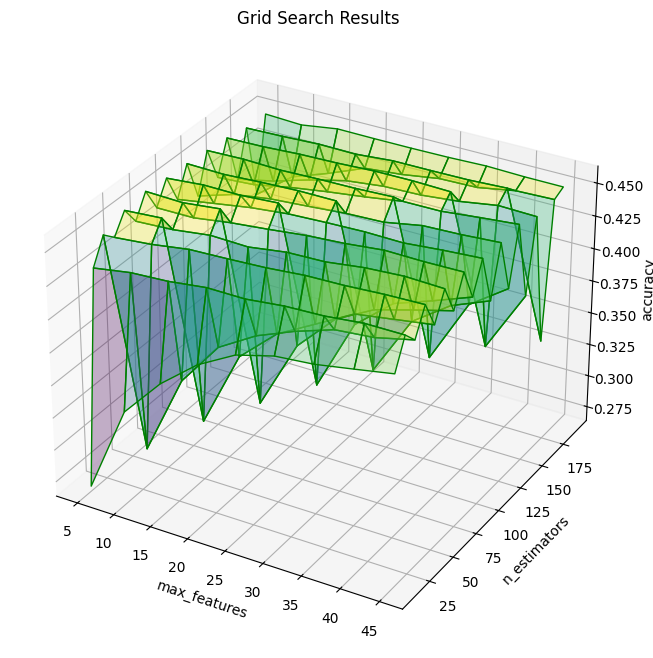

In [76]:
# plot 3d on the grid search results: max_features, n_estimators, and accuracy
fig = plt.figure(figsize=(12, 8))

# create a 3d subplot
ax = plt.axes(projection='3d')

# create a meshgrid
x = max_features_v
y = n_estimators_v
xx, yy = np.meshgrid(x, y)
zz = grid_search.cv_results_['mean_test_score'].reshape(xx.shape)

# plot the grid search results
ax.plot_surface(xx, yy, zz, cmap='viridis', edgecolor='green', alpha=0.3)

ax.set_title('Grid Search Results')
ax.set_xlabel('max_features')
ax.set_ylabel('n_estimators')
ax.set_zlabel('accuracy')

plt.show()

**4. Retrain your RF with the optimized settings and perform a final test.**

In [77]:
# create a RandomForestClassifier object with the best parameters
rf_clf_best = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'], 
    max_features=grid_search.best_params_['max_features'], 
    random_state=10)

# fit the model with X_train and y_train
rf_clf_best.fit(X_train, y_train)

# predict the labels of X_test
y_pred_rf_clf_best = rf_clf_best.predict(X_test)

In [245]:
# save the model
joblib.dump(rf_clf_best, 'rf_clf_best.pkl')

['rf_clf_best.pkl']

In [163]:
# save the accuracies to the comparison dictionary
comparison['rf_clf_best'] = {
    'acc_train': grid_search.best_score_, 
    'acc_test': rf_clf_best.score(X_test, y_test)}

In [164]:
# perform 5-fold cross validation on the rf classifier with best parameters
rf_best_scores = cross_val_score(rf_clf_best, X_np, y_np, cv=cv_skf)

In [165]:
# save the scores to the comparison dictionary
comparison['rf_clf_best']['5-fold_scores'] = rf_best_scores

In [166]:
# append row to the PrettyTable object
def append_row (pt, model_name):
    '''
    This function appends the results of the model to the PrettyTable object.
    '''
    pt.add_row([model_name, 
                comparison[model_name]['acc_train'], 
                comparison[model_name]['acc_test'], 
                comparison[model_name]['5-fold_scores'].mean(), 
                comparison[model_name]['5-fold_scores'].std()])

In [167]:
# append the results to the PrettyTable object
append_row(pt, 'rf_clf_best')

**5. Output your test results.**

In [169]:
# print the results
print_results('Random Forest Classifier with Best Parameters', comparison, 'rf_clf_best')

Random Forest Classifier with Best Parameters:
Training accuracy: 0.458847
Testing accuracy: 0.451230


### 8. Stacking Ensemble:

**1. Create a stacking ensemble using the Decision Tree, KNN, and SVM as base learners, and a Random Forest as the meta-model.**

In [186]:
# define the base learners
base_learners = [
    ('dt_clf_en', DecisionTreeClassifier(random_state=10)),
    ('knn_clf_en', KNeighborsClassifier()),
    ('svm_clf_en', SVC(random_state=10))
]

# define the meta learner
clf_meta = RandomForestClassifier(random_state=10)

In [88]:
# create a StackingClassifier object
stack_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=clf_meta,
    cv=cv_skf,
    verbose=1)

**2. Train this ensemble on the training data and evaluate its performance on the test data.**

In [142]:
# save the results to the comparison dictionary
def save_results (dict, model_name, model, scores):
    '''
    This function saves the results of the model to the dictionary.
    '''
    # save the accuracies to the dictionary for comparison
    dict[model_name] = {
        'acc_train': model.score(X_train, y_train), 
        'acc_test': model.score(X_test, y_test)
        }
    # save the scores to the dictionary for comparison
    dict[model_name]['5-fold_scores'] = scores

In [89]:
# fit the model with X_train and y_train
stack_clf.fit(X_train, y_train)

# predict the labels of X_test
y_pred_stack_clf = stack_clf.predict(X_test)

In [246]:
# save the model
joblib.dump(stack_clf, 'stack_clf.pkl')

['stack_clf.pkl']

In [144]:
# perform 5-fold cross validation on the ensemble classifier
stack_clf_scores = cross_val_score(stack_clf, X_np, y_np, cv=cv_skf)

In [172]:
# save the results to the comparison dictionary
save_results(comparison, 'stack_clf', stack_clf, stack_clf_scores)

In [175]:
# append the results to the PrettyTable object
append_row(pt, 'stack_clf')

**3. Compare the performance of the stacking ensemble to the previous models and report its accuracy.**

In [173]:
# print the results
print_results('Stacking Classifier', comparison, 'stack_clf')

Stacking Classifier:
Training accuracy: 0.918647
Testing accuracy: 0.443172


In [176]:
print(pt)

+-------------+---------------------+---------------------+--------------------------------------+------------------------------------+
|    Model    |  Training Accuracy  |   Testing Accuracy  | Stratified 5-fold Accuracy (Average) | Stratified 5-fold Accuracy Std Dev |
+-------------+---------------------+---------------------+--------------------------------------+------------------------------------+
|    rf_clf   |  0.9983029274501485 |  0.3672603901611535 |          0.4052258391170905          |        0.008354016810558482        |
|   knn_clf   |  0.5326686465846415 | 0.30364715860899066 |          0.3258095370727226          |        0.009426081103632184        |
|    dt_clf   |  0.9984089944845143 |  0.2786259541984733 |          0.2791442882317231          |        0.013298848564163227        |
| rf_clf_best | 0.45884656170976423 | 0.45122985581000846 |          0.4761582178291218          |        0.014082522265795813        |
|  stack_clf  |  0.9186465846414934 |  0.4431721

**Discussion**
1. The Stacking ensemble model gives a testing accuracy of 0.443172. It performs almost as good as the best random forest model.
2. Considering the stratified 5-fold cross validation, the best random forest model is also better than the stacking ensemble model. The stratified 5-fold average accuracy of the stacking ensemble is 0.467249 with a standard deviation of 0.015391. The average accuracy is slightly less than that of the best random forest model while the standard deviation is also slightly larger than that of the best random forest model.

### 9. Improving Performance

**1. Improve the score of your ensemble using any means.**

**Hints:**
**For hyperparameter tuning, you can use nested loops or other methods to systematically explore the parameter space.**

**Discussion**

For this section, we would investigate some experiments in model architecture to increase the accuracy score of the ensemble. Since the dataset is imbalanced, in addition to training accuracy and testing accuracy, we would also look at the stratified 5-fold cross validation metrics for performance consideration.

##### Experiment 1 - adding more models as base learners
1. In addition to DT, KNN and SVM, we would also add Gaussian Naive Bayes, a Bagging classifier and An AdaBoost classifier to the base learners. 
2. For the Final estimator, we would keep the same RF we used in the model stack_clf.

In [95]:
# define the base learners
base_learners_02 = [
    ('dt_clf_en', DecisionTreeClassifier(random_state=10)),
    ('knn_clf_en', KNeighborsClassifier()),
    ('svm_clf_en', SVC(random_state=10)),
    ('nb_clf_en', GaussianNB()),
    ('bag_clf_en', BaggingClassifier(random_state=10)),
    ('ada_clf_en', AdaBoostClassifier(random_state=10))
]

In [96]:
# create a StackingClassifier object
stack_clf_02 = StackingClassifier(
    estimators=base_learners_02,
    final_estimator=clf_meta,
    cv=cv_skf,
    verbose=1)

In [97]:
# fit the model with X_train and y_train
stack_clf_02.fit(X_train, y_train)

# predict the labels of X_test
y_pred_stack_clf_02 = stack_clf_02.predict(X_test)

In [247]:
# save the model
joblib.dump(stack_clf_02, 'stack_clf_02.pkl')

['stack_clf_02.pkl']

In [99]:
# perform 5-fold cross validation on the stacking 02 ensemble
stack_clf_02_scores = cross_val_score(stack_clf_02, X_np, y_np, cv=cv_skf)

In [177]:
# save the results to the comparison dictionary
save_results(comparison, 'stack_clf_02', stack_clf_02, stack_clf_02_scores)

In [178]:
# append the results to the PrettyTable object
append_row(pt, 'stack_clf_02')

In [179]:
print(pt)

+--------------+---------------------+---------------------+--------------------------------------+------------------------------------+
|    Model     |  Training Accuracy  |   Testing Accuracy  | Stratified 5-fold Accuracy (Average) | Stratified 5-fold Accuracy Std Dev |
+--------------+---------------------+---------------------+--------------------------------------+------------------------------------+
|    rf_clf    |  0.9983029274501485 |  0.3672603901611535 |          0.4052258391170905          |        0.008354016810558482        |
|   knn_clf    |  0.5326686465846415 | 0.30364715860899066 |          0.3258095370727226          |        0.009426081103632184        |
|    dt_clf    |  0.9984089944845143 |  0.2786259541984733 |          0.2791442882317231          |        0.013298848564163227        |
| rf_clf_best  | 0.45884656170976423 | 0.45122985581000846 |          0.4761582178291218          |        0.014082522265795813        |
|  stack_clf   |  0.9186465846414934 |  0

**Comment**

1. The stacking ensemble 02 model does not have an improvement in average accuracy. It is 0.460037, which is not greater than that of model stack_clf.
2. There is a significant improvement in accuracy standard deviation. It is 0.008871, which is a much less than that of model stack_clf at 0.015391.

##### Experiment 2 - use the best parameters for each base learner
1. We continue the journey to experience other options. Based on stack_clf, we would use the best models in both the base learners and the final estimator. 
2. We would perform grid search to help us find the best model.

In [123]:
# carry out grid search on the dt classifier
param_grid_dt = {
    'max_depth': np.arange(10, 50, 5),
    'min_samples_split': np.arange(5, 20, 5),
    'min_samples_leaf': np.arange(5, 20, 5),
    'criterion': ['gini', 'entropy']
}

In [124]:
# create a GridSearchCV object
grid_search_dt = GridSearchCV(
    estimator=dt_clf, 
    param_grid=param_grid_dt,
    cv=cv_skf,
    verbose=1)

In [125]:
# fit the model with X_train and y_train
grid_search_dt.fit(X_train, y_train)

# print the best parameters
grid_search_dt.best_params_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


{'criterion': 'gini',
 'max_depth': 40,
 'min_samples_leaf': 5,
 'min_samples_split': 15}

In [181]:
# setup the best dt classifier
dt_clf_best = DecisionTreeClassifier(
    criterion=grid_search_dt.best_params_['criterion'],
    max_depth=grid_search_dt.best_params_['max_depth'],
    min_samples_leaf=grid_search_dt.best_params_['min_samples_leaf'],
    min_samples_split=grid_search_dt.best_params_['min_samples_split'],
    random_state=10)

In [134]:
# carry out grid search on the knn classifier
param_grid_knn = {
    'n_neighbors': np.arange(5, 100, 5),
    'weights': ['uniform', 'distance']
}

In [135]:
# create a GridSearchCV object
grid_search_knn = GridSearchCV(
    estimator=knn_clf, 
    param_grid=param_grid_knn,
    cv=cv_skf,
    verbose=1)

In [136]:
# fit the model with X_train and y_train
grid_search_knn.fit(X_train, y_train)

# print the best parameters
grid_search_knn.best_params_

Fitting 5 folds for each of 38 candidates, totalling 190 fits


{'n_neighbors': 10, 'weights': 'distance'}

In [182]:
# setup the best knn classifier
knn_clf_best = KNeighborsClassifier(
    n_neighbors=grid_search_knn.best_params_['n_neighbors'],
    weights=grid_search_knn.best_params_['weights'])

In [138]:
# carry out grid search on the svm classifier
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [139]:
# create a GridSearchCV object
grid_search_svm = GridSearchCV(
    estimator=SVC(), 
    param_grid=param_grid_svm,
    cv=cv_skf,
    verbose=1)

In [140]:
# fit the model with X_train and y_train
grid_search_svm.fit(X_train, y_train)

# print the best parameters
grid_search_svm.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [183]:
# setup the best svm classifier
svm_clf_best = SVC(
    C=grid_search_svm.best_params_['C'],
    gamma=grid_search_svm.best_params_['gamma'],
    kernel=grid_search_svm.best_params_['kernel'],
    random_state=10)

We have obtained the best models of DT, KNN and SVM for base learners. For the final estimator, we would use the best RF (rf_clf_best) we obtained previously. 

In [185]:
# define the base learners
base_learners_03 = [
    ('dt_clf_en', dt_clf_best),
    ('knn_clf_en', knn_clf_best),
    ('svm_clf_en', svm_clf_best)
]

# define the meta learner
clf_meta_03 = rf_clf_best

In [187]:
# create a StackingClassifier object
stack_clf_03 = StackingClassifier(
    estimators=base_learners_03,
    final_estimator=clf_meta_03,
    cv=cv_skf,
    verbose=1)

In [188]:
# fit the model with X_train and y_train
stack_clf_03.fit(X_train, y_train)

# predict the labels of X_test
y_pred_stack_clf_03 = stack_clf_03.predict(X_test)

In [244]:
# save the model
joblib.dump(stack_clf_03, 'stack_clf_03.pkl')

['stack_clf_03.pkl']

In [189]:
# perform 5-fold cross validation on the ensemble classifier
stack_clf_03_scores = cross_val_score(stack_clf_03, X_np, y_np, cv=cv_skf)

In [190]:
# save the results to the comparison dictionary
save_results(comparison, 'stack_clf_03', stack_clf_03, stack_clf_03_scores)

In [191]:
# append the results to the PrettyTable object
append_row(pt, 'stack_clf_03')

In [192]:
print(pt)

+--------------+---------------------+---------------------+--------------------------------------+------------------------------------+
|    Model     |  Training Accuracy  |   Testing Accuracy  | Stratified 5-fold Accuracy (Average) | Stratified 5-fold Accuracy Std Dev |
+--------------+---------------------+---------------------+--------------------------------------+------------------------------------+
|    rf_clf    |  0.9983029274501485 |  0.3672603901611535 |          0.4052258391170905          |        0.008354016810558482        |
|   knn_clf    |  0.5326686465846415 | 0.30364715860899066 |          0.3258095370727226          |        0.009426081103632184        |
|    dt_clf    |  0.9984089944845143 |  0.2786259541984733 |          0.2791442882317231          |        0.013298848564163227        |
| rf_clf_best  | 0.45884656170976423 | 0.45122985581000846 |          0.4761582178291218          |        0.014082522265795813        |
|  stack_clf   |  0.9186465846414934 |  0

**Comment**

1. For this stacking ensemble stack_clf_03, the average accuracy is 0.481587 and the standard deviation of accuracy is 0.011850. Both metrics are better than the original (stack_clf) stacking ensemble. 
2. The stack_clf_03 also performs better than the best random forest ensemble (rf_clf_best).

##### Experiment 3 - use grid search on the stacking classifier to find its best parameters
There are parameters that we can set on the stacking classifier itself. We would do a grid search on those parameters.

*note*: There are 3 options in 'stack_method', namely 'predict_proba', 'decision_function', 'predict', but only 'predict' works for our base learners.

In [198]:
# carry out grid search on the stacking classifier
param_grid_stack = {
    'stack_method': ['predict'],
    'passthrough': [True, False]
}

In [199]:
# create a GridSearchCV object
grid_search_stack = GridSearchCV(
    estimator=stack_clf, 
    param_grid=param_grid_stack,
    cv=cv_skf,
    verbose=1)

In [200]:
# fit the model with X_train and y_train
grid_search_stack.fit(X_train, y_train)

# print the best parameters
grid_search_stack.best_params_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


{'passthrough': True, 'stack_method': 'predict'}

In [201]:
# set up the best stacking classifier
stack_clf_04 = StackingClassifier(
    estimators=base_learners,
    final_estimator=clf_meta,
    cv=cv_skf,
    verbose=1,
    stack_method=grid_search_stack.best_params_['stack_method'],
    passthrough=grid_search_stack.best_params_['passthrough'])

In [204]:
# fit the model with X_train and y_train
stack_clf_04.fit(X_train, y_train)

# predict the labels of X_test
y_pred_stack_clf_04 = stack_clf_04.predict(X_test)

In [243]:
# save the model 
joblib.dump(stack_clf_04, 'stack_clf_04.joblib')

['stack_clf_04.joblib']

In [205]:
# perform 5-fold cross validation on the ensemble classifier
stack_clf_04_scores = cross_val_score(stack_clf_04, X_np, y_np, cv=cv_skf)

In [206]:
# save the results to the comparison dictionary
save_results(comparison, 'stack_clf_04', stack_clf_04, stack_clf_04_scores)

In [207]:
# append the results to the PrettyTable object
append_row(pt, 'stack_clf_04')

In [208]:
print(pt)

+--------------+---------------------+---------------------+--------------------------------------+------------------------------------+
|    Model     |  Training Accuracy  |   Testing Accuracy  | Stratified 5-fold Accuracy (Average) | Stratified 5-fold Accuracy Std Dev |
+--------------+---------------------+---------------------+--------------------------------------+------------------------------------+
|    rf_clf    |  0.9983029274501485 |  0.3672603901611535 |          0.4052258391170905          |        0.008354016810558482        |
|   knn_clf    |  0.5326686465846415 | 0.30364715860899066 |          0.3258095370727226          |        0.009426081103632184        |
|    dt_clf    |  0.9984089944845143 |  0.2786259541984733 |          0.2791442882317231          |        0.013298848564163227        |
| rf_clf_best  | 0.45884656170976423 | 0.45122985581000846 |          0.4761582178291218          |        0.014082522265795813        |
|  stack_clf   |  0.9186465846414934 |  0

**Comment**

1. For this stacking ensemble stack_clf_04, the average accuracy is 0.476666 and the standard deviation of accuracy is 0.014041. Both metrics are better than the original (stack_clf) stacking ensemble. 
2. It is slightly better than the random forest ensemble (rf_clf_best) for both metrics too.

##### Experiment 4 - combine Experiment 1, 2 and 3
From the above 3 experiments that we varied from the stack_clf, we have achieved improvements in increase in accuracy and decrease in standard deviation. In this attempt, we would combine the architecture.

In [212]:
# continue to carry out grid search on the base learners
# find the best parameters for the naive bayes classifier
param_grid_nb = {
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7]
}

In [213]:
# create a GridSearchCV object
grid_search_nb = GridSearchCV(
    estimator=GaussianNB(), 
    param_grid=param_grid_nb,
    cv=cv_skf,
    verbose=1)

In [214]:
# fit the model with X_train and y_train
grid_search_nb.fit(X_train, y_train)

# print the best parameters
grid_search_nb.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'var_smoothing': 1e-07}

In [215]:
# set up the best naive bayes classifier
nb_clf_best = GaussianNB(
    var_smoothing=grid_search_nb.best_params_['var_smoothing'])

In [225]:
# find the best parameters for the bagging classifier
param_grid_bag = {
    'n_estimators': np.arange(10, 40, 10),
    'max_samples': np.arange(0.05, 0.8, 0.2),
    'max_features': np.arange(0.05, 0.8, 0.2),
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

In [226]:
# create a GridSearchCV object
grid_search_bag = GridSearchCV(
    estimator=BaggingClassifier(random_state=10), 
    param_grid=param_grid_bag,
    cv=cv_skf,
    verbose=1)

In [227]:
# fit the model with X_train and y_train
grid_search_bag.fit(X_train, y_train)

# print the best parameters
grid_search_bag.best_params_

Fitting 5 folds for each of 192 candidates, totalling 960 fits


{'bootstrap': False,
 'bootstrap_features': True,
 'max_features': 0.6500000000000001,
 'max_samples': 0.6500000000000001,
 'n_estimators': 30}

In [228]:
# set up the best bagging classifier
bag_clf_best = BaggingClassifier(
    n_estimators=grid_search_bag.best_params_['n_estimators'],
    max_samples=grid_search_bag.best_params_['max_samples'],
    max_features=grid_search_bag.best_params_['max_features'],
    bootstrap=grid_search_bag.best_params_['bootstrap'],
    bootstrap_features=grid_search_bag.best_params_['bootstrap_features'],
    random_state=10)

In [229]:
# find the best parameters for the adaboost classifier
param_grid_ada = {
    'n_estimators': np.arange(10, 40, 10),
    'learning_rate': np.arange(0.1, 1.0, 0.3),
    'algorithm': ['SAMME', 'SAMME.R']
}

In [230]:
# create a GridSearchCV object
grid_search_ada = GridSearchCV(
    estimator=AdaBoostClassifier(random_state=10), 
    param_grid=param_grid_ada,
    cv=cv_skf,
    verbose=1)

In [231]:
# fit the model with X_train and y_train
grid_search_ada.fit(X_train, y_train)

# print the best parameters
grid_search_ada.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'algorithm': 'SAMME.R', 'learning_rate': 0.4, 'n_estimators': 30}

In [232]:
# set up the best adaboost classifier
ada_clf_best = AdaBoostClassifier(
    n_estimators=grid_search_ada.best_params_['n_estimators'],
    learning_rate=grid_search_ada.best_params_['learning_rate'],
    algorithm=grid_search_ada.best_params_['algorithm'],
    random_state=10)

We use 6 models in base learners and 1 final estimator. All 7 models are tuned to best performance using grid search and stratified 5-fold cross validation.

In [233]:
# define the base learners
base_learners_04 = [
    ('dt_clf_en', dt_clf_best),
    ('knn_clf_en', knn_clf_best),
    ('svm_clf_en', svm_clf_best),
    ('nb_clf_en', nb_clf_best),
    ('bag_clf_en', bag_clf_best),
    ('ada_clf_en', ada_clf_best)
]

In [234]:
# define the meta learner
clf_meta_04 = rf_clf_best

We use 'tuned' parameters for the stacking classifier.

In [235]:
# create a StackingClassifier object
stack_clf_05 = StackingClassifier(
    estimators=base_learners_04,
    final_estimator=clf_meta_04,
    cv=cv_skf,
    verbose=1,
    stack_method=grid_search_stack.best_params_['stack_method'],
    passthrough=grid_search_stack.best_params_['passthrough'])

In [236]:
# fit the model with X_train and y_train
stack_clf_05.fit(X_train, y_train)

# predict the labels of X_test
y_pred_stack_clf_05 = stack_clf_05.predict(X_test)

In [242]:
# save the model to a file
joblib.dump(stack_clf_05, 'stack_clf_05.pkl')

['stack_clf_05.pkl']

In [237]:
# perform 5-fold cross validation on the ensemble classifier
stack_clf_05_scores = cross_val_score(stack_clf_05, X_np, y_np, cv=cv_skf)

In [238]:
# save the results to the comparison dictionary
save_results(comparison, 'stack_clf_05', stack_clf_05, stack_clf_05_scores)

In [239]:
# append the results to the PrettyTable object
append_row(pt, 'stack_clf_05')

In [240]:
print(pt)

+--------------+---------------------+---------------------+--------------------------------------+------------------------------------+
|    Model     |  Training Accuracy  |   Testing Accuracy  | Stratified 5-fold Accuracy (Average) | Stratified 5-fold Accuracy Std Dev |
+--------------+---------------------+---------------------+--------------------------------------+------------------------------------+
|    rf_clf    |  0.9983029274501485 |  0.3672603901611535 |          0.4052258391170905          |        0.008354016810558482        |
|   knn_clf    |  0.5326686465846415 | 0.30364715860899066 |          0.3258095370727226          |        0.009426081103632184        |
|    dt_clf    |  0.9984089944845143 |  0.2786259541984733 |          0.2791442882317231          |        0.013298848564163227        |
| rf_clf_best  | 0.45884656170976423 | 0.45122985581000846 |          0.4761582178291218          |        0.014082522265795813        |
|  stack_clf   |  0.9186465846414934 |  0

**Discussion**
1. The stack_clf_05 model did an excellent job, and it is the best model with our experiments. It gives the highest testing accuracy. Considering stratified 5-fold cross validation, it improves the average accuracy and lowers its standard deviation in accuracy. 
2. Our experiment may stop here. However, we should be aware that, although stack_clf_05 is the best model, its average accuracy is still less than 50%. We should consider other machine learning algorithms to achieve better accuracy.